In [6]:
import numpy as np
from data_loader import *
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [7]:
df_original = pd.read_csv("data/MSFT.csv")
print(df_original.head())

         Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.061751  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.063956   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.065059   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.063405    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.062302    47894400


In [8]:
prophet_df = df_original[['Date','Adj Close']]
prophet_df = prophet_df.rename(columns = {'Date':'ds'})
prophet_df = prophet_df.rename(columns = {'Adj Close':'y'})
print(prophet_df.head())

train_mask = (prophet_df["ds"] < "2019-01-01")
test_mask = (prophet_df["ds"] >= "2019-01-01") & (prophet_df["ds"] < "2020-01-01")

train_set = prophet_df.loc[train_mask]
test_set = prophet_df.loc[test_mask]

           ds         y
0  1986-03-13  0.061751
1  1986-03-14  0.063956
2  1986-03-17  0.065059
3  1986-03-18  0.063405
4  1986-03-19  0.062302


In [9]:
m = Prophet()
m.fit(train_set)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future = m.make_future_dataframe(periods=0) # change to 365 later
forecast = m.predict(future)
# if( forecast.shape[0] == train_set.shape[0] ):
#     print(" the forecast can be evaluated")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

 the forecast can be evaluated
             ds       yhat  yhat_lower  yhat_upper
8264 2018-12-24  89.616936   84.067631   95.215024
8265 2018-12-26  89.604046   84.438465   94.966738
8266 2018-12-27  89.650845   84.662382   94.974925
8267 2018-12-28  89.653267   84.047981   95.358865
8268 2018-12-31  89.668430   84.448729   94.784431


4.123880525903096
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


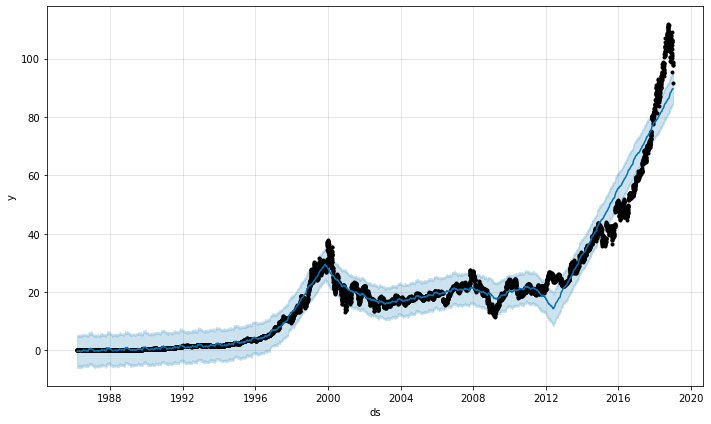

In [12]:
rms = mean_squared_error(train_set[['y']], forecast[['yhat']], squared=False)
print(rms)
fig1 = m.plot(forecast)